# Prédiction durée de trajet en taxi NYC

### Import des biblitohèques

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date
import calendar

Importation du dataset

In [2]:
path = 'D:\Documents\Taxi Trip NYC\data\\train.csv'

df = pd.read_csv(path,encoding='latin-1')

Taille du dataset : 1,5 Millions de lignes pour 11 colonnes

In [3]:
df.shape

(1458644, 11)

Données manquantes : nulles

In [4]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [82]:
df['pickup_datetime'].hist()
print(df['pickup_datetime'].describe())
plt.show()

KeyboardInterrupt: 

### Nettoyage des données

#### Trip Duration

On remarque que des valeurs dépassent les 3millions de secondes ce qui est incohérent pour des trajets de taxi.
On fixe comme 2H comme limite de temps de course.

count    1.456391e+06
mean     8.360749e+02
std      6.543065e+02
min      1.000000e+00
25%      3.970000e+02
50%      6.610000e+02
75%      1.073000e+03
max      7.191000e+03
Name: trip_duration, dtype: float64
valeurs supprimées : 2253


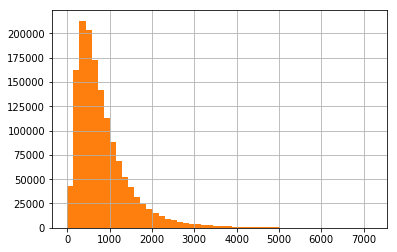

In [29]:
df_trip_duration = df[df['trip_duration'] < 7200]
df_trip_duration['trip_duration'].hist(bins =50)
print(df_trip_duration['trip_duration'].describe())
print('valeurs supprimées : ' + str(df.shape[0] - df_trip_duration.shape[0]))
plt.show()

#### Pickup Latitude

count    1.458473e+06
mean     4.075092e+01
std      2.804655e-02
min      4.050629e+01
25%      4.073735e+01
50%      4.075410e+01
75%      4.076836e+01
max      4.092059e+01
Name: pickup_latitude, dtype: float64
valeurs supprimées : 171


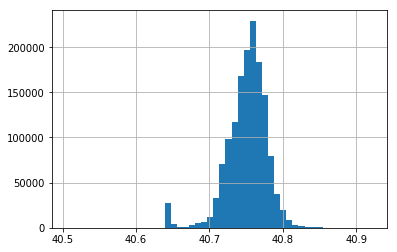

In [34]:
df_pickup_lat_temp = df[df['pickup_latitude'] < 40.921]
df_pickup_lat = df_pickup_lat_temp[df_pickup_lat_temp['pickup_latitude'] > 40.500]
df_pickup_lat['pickup_latitude'].hist(bins =50)
print(df_pickup_lat['pickup_latitude'].describe())
print('valeurs supprimées : ' + str(df.shape[0] - df_pickup_lat.shape[0]))
plt.show()

#### Dropoff Latitude

count    1.458021e+06
mean     4.075174e+01
std      3.201436e-02
min      4.050860e+01
25%      4.073587e+01
50%      4.075451e+01
75%      4.076978e+01
max      4.092063e+01
Name: dropoff_latitude, dtype: float64
valeurs supprimées : 623


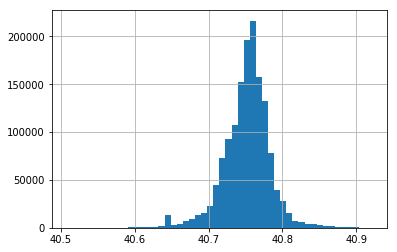

In [35]:
df_dropoff_lat_temp = df[df['dropoff_latitude'] < 40.921]
df_dropoff_lat_temp = df_dropoff_lat_temp[df_dropoff_lat_temp['dropoff_latitude'] > 40.500]
df_dropoff_lat_temp['dropoff_latitude'].hist(bins =50)
print(df_dropoff_lat_temp['dropoff_latitude'].describe())
print('valeurs supprimées : ' + str(df.shape[0] - df_dropoff_lat_temp.shape[0]))
plt.show()

#### Pickup Longitude

count    1.458441e+06
mean    -7.397345e+01
std      3.815888e-02
min     -7.425517e+01
25%     -7.399187e+01
50%     -7.398174e+01
75%     -7.396734e+01
max     -7.369521e+01
Name: pickup_longitude, dtype: float64
valeurs supprimées : 203


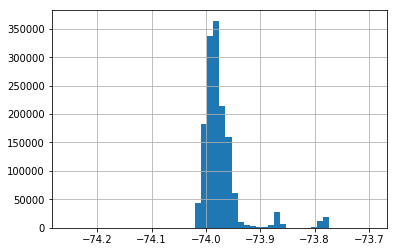

In [37]:
df_pickup_lon_temp = df[df['pickup_longitude'] < -73.695]
df_pickup_lon = df_pickup_lon_temp[df_pickup_lon_temp['pickup_longitude'] > -74.258 ]
df_pickup_lon['pickup_longitude'].hist(bins =50)
print(df_pickup_lon['pickup_longitude'].describe())
print('valeurs supprimées : ' + str(df.shape[0] - df_pickup_lon.shape[0]))
plt.show()

#### Dropoff Longitude

count    1.457853e+06
mean    -7.397347e+01
std      3.511736e-02
min     -7.425517e+01
25%     -7.399133e+01
50%     -7.397976e+01
75%     -7.396304e+01
max     -7.369505e+01
Name: dropoff_longitude, dtype: float64
valeurs supprimées : 791


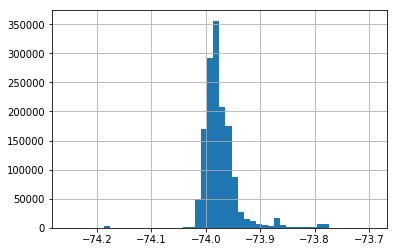

In [46]:
df_dropoff_lon_temp = df[df['dropoff_longitude'] < -73.695]
df_dropoff_lon = df_dropoff_lon_temp[df_dropoff_lon_temp['dropoff_longitude'] > -74.258 ]
df_dropoff_lon['dropoff_longitude'].hist(bins =50)
print(df_dropoff_lon['dropoff_longitude'].describe())
print('valeurs supprimées : ' + str(df.shape[0] - df_dropoff_lon.shape[0]))
plt.show()

#### Plot des pickup

In [47]:
sns.regplot(x=df_pickup_lon['pickup_longitude'], y=df_pickup_lat['pickup_latitude'])

KeyboardInterrupt: 

On reconnaît manhhatan, le bronx, le queens, brooklyn

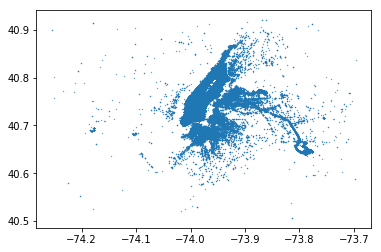

In [11]:
plt.close()
df_pickup_lon_temp = df[df['pickup_longitude'] < -73.695]
df_pickup_lon = df_pickup_lon_temp[df_pickup_lon_temp['pickup_longitude'] > -74.258 ]
df_pickup_lat_temp = df_pickup_lon[df_pickup_lon['pickup_latitude'] < 40.921]
df_pickup_lat = df_pickup_lat_temp[df_pickup_lat_temp['pickup_latitude'] > 40.500]

df_sample = df_pickup_lat.sample(frac=1, replace=True)
x = df_sample['pickup_longitude']
y = df_sample['pickup_latitude']

plt.plot( x, y, linestyle='', marker='o', markersize=0.3)

plt.show()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
242363,id2315817,2,2016-02-25 22:38:31,2016-02-25 22:43:09,1,-73.982727,40.767342,-73.995789,40.764484,N,278
1022453,id1955395,2,2016-03-05 21:54:29,2016-03-05 22:08:08,5,-73.972153,40.793472,-73.948128,40.776089,N,819
1292501,id1801516,2,2016-06-29 18:14:53,2016-06-29 18:54:20,6,-73.983261,40.761311,-74.015984,40.715069,N,2367
765884,id0909783,2,2016-04-30 01:27:34,2016-04-30 01:40:05,1,-74.004852,40.728619,-73.973503,40.748718,N,751
205495,id1522353,1,2016-01-06 19:30:08,2016-01-06 19:49:21,1,-73.874512,40.774059,-73.992889,40.754341,N,1153
983488,id3960374,2,2016-01-16 08:13:14,2016-01-16 08:45:03,1,-73.789978,40.646618,-73.983330,40.750107,N,1909
605110,id1734473,2,2016-05-17 19:27:24,2016-05-17 20:03:06,2,-73.987267,40.735851,-73.982712,40.666599,N,2142
931085,id2229924,2,2016-03-13 12:27:03,2016-03-13 12:49:21,1,-73.959831,40.773647,-74.006874,40.713589,N,1338
1126644,id0551862,1,2016-03-11 09:53:45,2016-03-11 09:57:43,4,-73.989601,40.758461,-73.990318,40.751266,N,238
1442427,id0810009,2,2016-02-17 12:50:53,2016-02-17 12:54:01,1,-73.963829,40.767696,-73.957687,40.765530,N,188


#### Parser de date

In [125]:
def dateparser(row):
    rowtemp = row.split(' ')
    rowtemp2 = rowtemp[0].split('-') + rowtemp[1].split(':')
    return(rowtemp2)
def creationNewColumnsDate(i,row):
    return(int(row[i]))
def getDay(row):
    year = row.year
    month = row.month
    day_date = row.date
    my_date = date(year, month, day_date)
    return(calendar.day_name[my_date.weekday()])
    
    

In [96]:
date = df['pickup_datetime'].apply(lambda row: dateparser(row))
types = ['year','month','date','hour','minute','second']
for i in range(0,6):
    data = date.apply(lambda row: creationNewColumnsDate(i,row))
    df[types[i]] = data


id                              id2875421
vendor_id                               2
pickup_datetime       2016-03-14 17:24:55
dropoff_datetime      2016-03-14 17:32:30
passenger_count                         1
pickup_longitude                 -73.9822
pickup_latitude                   40.7679
dropoff_longitude                -73.9646
dropoff_latitude                  40.7656
store_and_fwd_flag                      N
trip_duration                         455
year                                 2016
month                                   3
day                                    14
hour                                   17
minute                                 24
second                                 55
date                                   14
Name: 0, dtype: object
id                              id2875421
vendor_id                               2
pickup_datetime       2016-03-14 17:24:55
dropoff_datetime      2016-03-14 17:32:30
passenger_count                         1
pickup_long

TypeError: ("'Series' object is not callable", u'occurred at index 0')

In [126]:
day = df.apply(lambda row: getDay(row),axis =1)
df['day'] = day

In [127]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,hour,minute,second,date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016,3,Monday,17,24,55,14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016,6,Sunday,0,43,35,12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016,1,Tuesday,11,35,24,19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016,4,Wednesday,19,32,31,6
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016,3,Saturday,13,30,55,26
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,2016,1,Saturday,22,1,40,30
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,2016,6,Friday,22,34,59,17
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,2016,5,Saturday,7,54,58,21
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,2016,5,Friday,23,12,23,27
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,2016,3,Thursday,21,45,1,10


In [77]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
year                    int64
month                   int64
day                     int64
hour                    int64
minute                  int64
second                  int64
dtype: object

In [ ]:
datetime.datetime(2012, 3, 23, 23, 24, 55, 173504)
datetime.datetime.today().weekday()

In [122]:
row = df.iloc[0]

In [124]:
year = row.year
month = row.month
day_date = row.date
my_date = date(year, month, day_date)

calendar.day_name[my_date.weekday()]

'Monday'

In [120]:
my_date = date.today()
calendar.day_name[my_date.weekday()]

AttributeError: 'numpy.int64' object has no attribute 'today'